# Function Transformer

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
# load the dataset
df =sns.load_dataset('titanic')[['age','fare', 'survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [4]:
# check missing values percentage
df.isnull().sum()*100 /len(df)

age         19.86532
fare         0.00000
survived     0.00000
dtype: float64

In [5]:
# fill missing values in 'age' column with mean age
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\FAHAD\AppData\Local\Temp\ipykernel_4940\4198679739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [6]:
# split the data into features and target variable
X = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [7]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

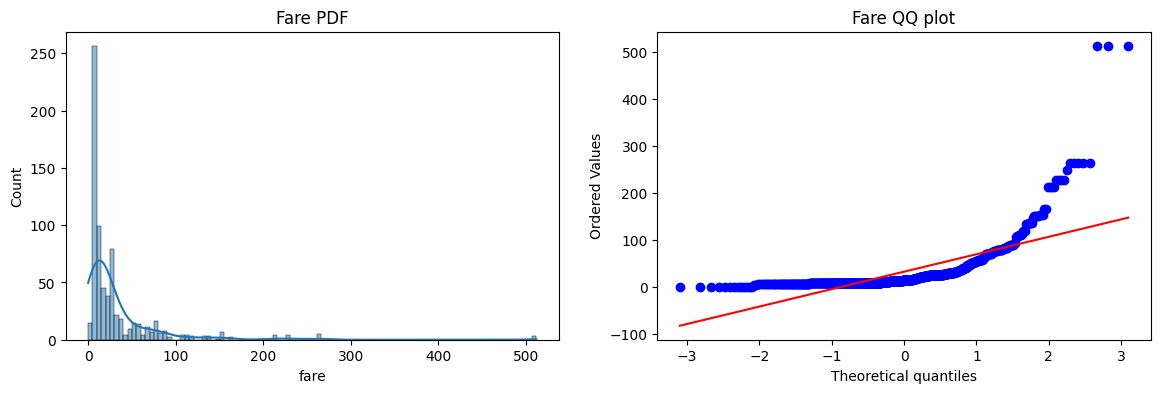

In [9]:
# Set the total size of the figure (width=14, height=4).
plt.figure(figsize=(14, 4))

# Create the first subplot (1 row, 2 columns, 1st plot).
plt.subplot(121)
# Plot a histogram with a Kernel Density Estimate (KDE) line for the 'fare' data.
sns.histplot(X_train['fare'], kde=True)
# Set the title for this first plot.
plt.title('Fare PDF')

# Create the second subplot (1 row, 2 columns, 2nd plot).
plt.subplot(122)
# Generate a Q-Q plot to compare the 'fare' distribution to a normal distribution.
stats.probplot(X_train['fare'], dist='norm', plot=plt)
# Set the title for this second plot.
plt.title('Fare QQ plot')

# Display both plots.
plt.show()

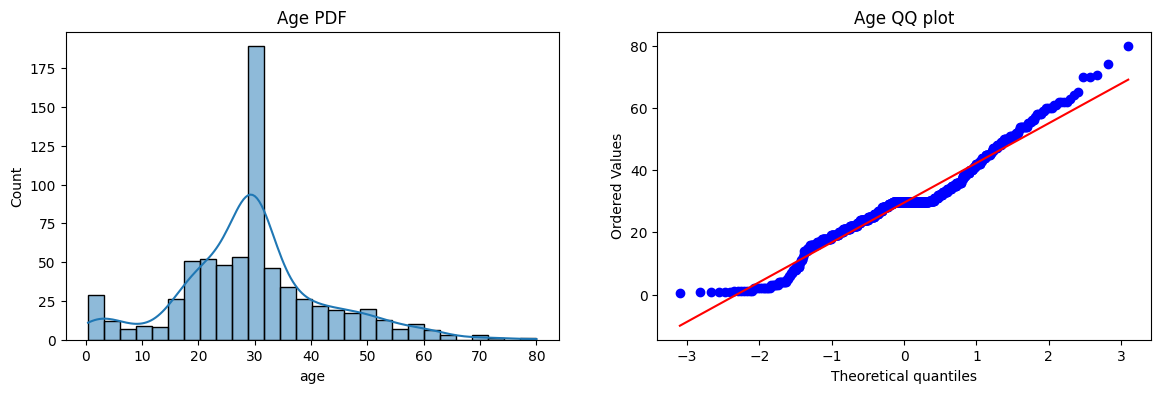

In [11]:
# Set the total size of the figure (width=14, height=4).
plt.figure(figsize=(14, 4))

# Create the first subplot (1 row, 2 columns, 1st plot).
plt.subplot(121)
# Plot a histogram with a Kernel Density Estimate (KDE) line for the 'age' data.
sns.histplot(X_train['age'], kde=True)
# Set the title for this first plot.
plt.title('Age PDF')

# Create the second subplot (1 row, 2 columns, 2nd plot).
plt.subplot(122)
# Generate a Q-Q plot to compare the 'age' distribution to a normal distribution.
stats.probplot(X_train['age'], dist='norm', plot=plt)
# Set the title for this second plot.
plt.title('Age QQ plot')

# Display both plots.
plt.show()

In [12]:
# Create a new Logistic Regression model object.
clf = LogisticRegression()

# Create a new Decision Tree Classifier model object.
clf2 = DecisionTreeClassifier()

In [13]:
# Train the Logistic Regression model on the training data.
clf.fit(X_train, y_train)
# Train the Decision Tree model on the training data.
clf2.fit(X_train, y_train)

# Get predictions from the Logistic Regression model using the test data.
y_pred = clf.predict(X_test)
# Get predictions from the Decision Tree model using the test data.
y_pred1 = clf2.predict(X_test)

# Calculate and print the accuracy of the Logistic Regression model.
print("Accuracy LR", accuracy_score(y_test, y_pred))
# Calculate and print the accuracy of the Decision Tree model.
print('Accuracy DT', accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [14]:
# Create a transformer that applies a log(1+x) transformation.
trf = FunctionTransformer(func= np.log1p)

In [15]:
# Apply the log(1+x) transform to the training data.
X_train_transformed = trf.fit_transform(X_train)

# Apply the *same* log(1+x) transform to the test data.
X_test_transformed = trf.transform(X_test)

In [18]:
# Initialize classifiers
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Train classifiers on the transformed training data
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

# Evaluate and print accuracy for both models
print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred1))



Accuracy LR 0.7374301675977654
Accuracy DT 0.5921787709497207


In [17]:
# Apply the transformer 'trf' to preprocess features
X_transformed = trf.fit_transform(X)

# Initialize classifiers
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Evaluate Logistic Regression using 10-fold cross-validation
print('LR', np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))

# Evaluate Decision Tree using 10-fold cross-validation
print('DT', np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))


LR 0.678027465667915
DT 0.6543820224719101


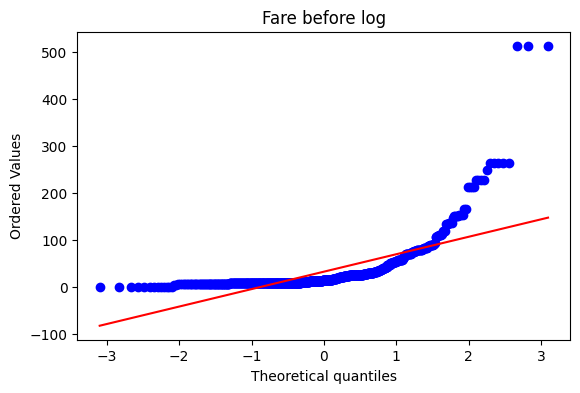

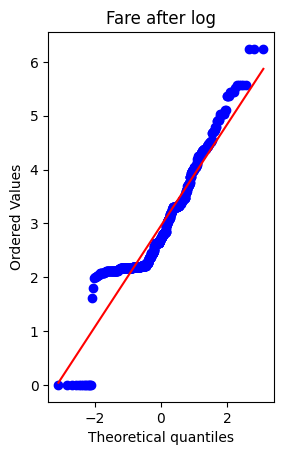

In [19]:
plt.figure(figsize=(14, 4))

# Q-Q plot before log transformation
plt.subplot(122)
stats.probplot(X_train['fare'], dist='norm', plot=plt)
plt.title('Fare before log')
plt.show()

# Q-Q plot after log transformation
plt.subplot(122)
stats.probplot(X_train_transformed['fare'], dist='norm', plot=plt)
plt.title('Fare after log')
plt.show()








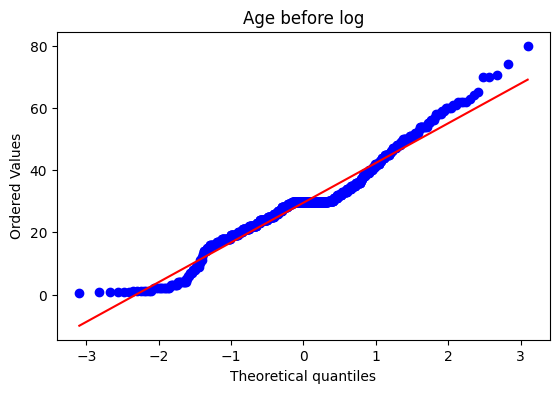

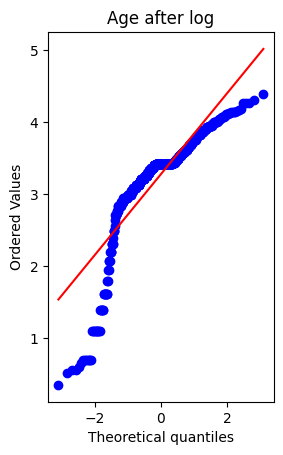

In [20]:
plt.figure(figsize=(14, 4))

# Q-Q plot before log transformation
plt.subplot(122)
stats.probplot(X_train['age'], dist='norm', plot=plt)
plt.title('Age before log')
plt.show()

# Q-Q plot after log transformation
plt.subplot(122)
stats.probplot(X_train_transformed['age'], dist='norm', plot=plt)
plt.title('Age after log')
plt.show()

In [22]:
trf2 = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p), ['fare'])
    ],
    remainder='passthrough'  # Keep all other columns unchanged
)

# Apply the transformation to training data
X_train_transformed2 = trf2.fit_transform(X_train)

# Apply the same transformation to test data (use transform, not fit_transform)
X_test_transformed2 = trf2.transform(X_test)

In [23]:
# Initialize classifiers
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Train classifiers on the log-transformed training data
clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

# Make predictions on the transformed test set
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

# Evaluate and print accuracy for both models
print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred2))


Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [24]:
# Apply the transformer 'trf' to preprocess features
X_transformed2 = trf.fit_transform(X)

# Initialize classifiers
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Evaluate Logistic Regression using 10-fold cross-validation
print('LR', np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))

# Evaluate Decision Tree using 10-fold cross-validation
print('DT', np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=10)))



LR 0.678027465667915
DT 0.6588639200998753
